In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics    

EPL = pd.read_csv(r'C:\Users\zzzmh\Course semester 1\Big Data\EPL_20_21.csv')


In [2]:
EPL.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


In [3]:
EPL.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


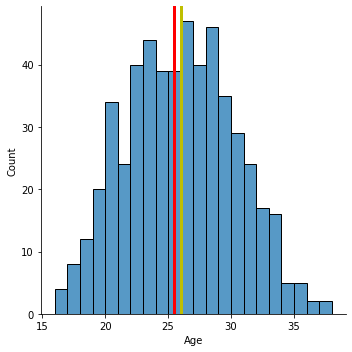

In [4]:
sns.displot(EPL['Age'],bins = 22)
plt.axvline(x = EPL['Age'].mean(), linewidth = 3, color='r')
plt.axvline(x = EPL['Age'].median(), linewidth = 3, color='y');


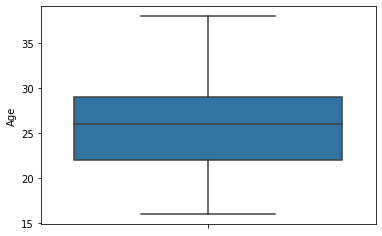

In [5]:
sns.boxplot(y=EPL['Age']);


In [6]:
age_cards = EPL.loc[:,('Age','Yellow_Cards')]
age_cards

,Age,Yellow_Cards
0,21,2
1,28,2
2,24,2
3,23,3
4,20,3
...,...,...
527,24,0
528,26,0
529,21,0
530,16,0


D:\anacon\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'WCSS')

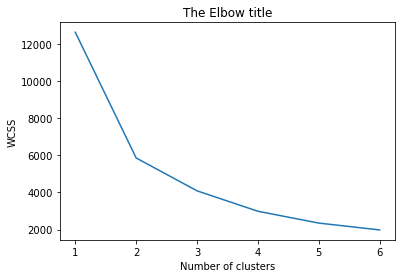

In [7]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(age_cards)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

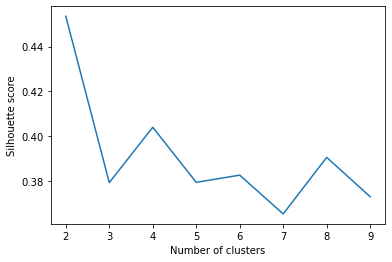

In [8]:
from sklearn import metrics

ss_score = []
for k in range(2,10):
    clf = KMeans(n_clusters=k,max_iter=1000)
    pred = clf.fit_predict(age_cards)
    ss = metrics.silhouette_score(age_cards,pred)
    ss_score.append(ss)
plt.plot(list(range(2,10)),ss_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');


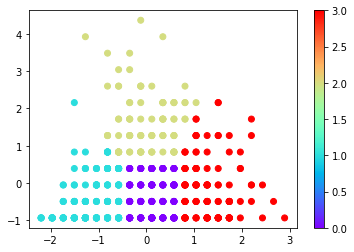

In [9]:
kmeans = KMeans(4)
scaler = StandardScaler()
train = scaler.fit_transform(age_cards)
identified_clusters = kmeans.fit_predict(age_cards)
train_data = pd.DataFrame(train)
data_with_clusters = train_data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters[0],data_with_clusters[1],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.colorbar();


In [10]:
pd.Series(kmeans.labels_).value_counts()

1    166
0    150
3    129
2     87
dtype: int64

In [11]:
age_cards['Name'] = EPL['Name']
age_cards['cluster'] = identified_clusters
age_cards[age_cards['cluster'] == 1 ]

,Age,Yellow_Cards,Name,cluster
0,21,2,Mason Mount,1
3,23,3,Ben Chilwell,1
4,20,3,Reece James,1
12,21,2,Christian Pulisic,1
13,21,2,Kai Havertz,1
...,...,...,...,...
524,23,1,Max Lowe,1
526,17,0,Daniel Jebbison,1
529,21,0,Iliman Ndiaye,1
530,16,0,Antwoine Hackford,1


In [12]:
EPL_S = EPL[EPL['Matches'] >= 10]
EPL_S

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Kean Bryan,Sheffield United,ENG,DF,23,13,12,1004,1,0,443,72.9,0,0,0.04,0.03,1,0
522,Jack Robinson,Sheffield United,ENG,DF,26,11,9,877,0,1,439,80.6,0,0,0.04,0.09,3,0
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0
525,Phil Jagielka,Sheffield United,ENG,DF,37,10,6,526,0,0,186,76.3,0,0,0.00,0.00,1,1


In [13]:
EPL_FW = EPL_S[EPL_S['Position'].str.match('FW.*')==True]
EPL_FW.loc[:,'Position']=3
EPL_FW


D:\anacon\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
2,Timo Werner,Chelsea,GER,3,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
12,Christian Pulisic,Chelsea,USA,3,21,27,18,1738,4,2,690,80.0,0,0,0.28,0.14,2,0
15,Hakim Ziyech,Chelsea,MAR,3,27,23,15,1172,2,3,734,74.7,0,0,0.15,0.28,3,0
16,Tammy Abraham,Chelsea,ENG,3,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0
18,Callum Hudson-Odoi,Chelsea,ENG,3,19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,3,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0
518,Oliver McBurnie,Sheffield United,SCO,3,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0
519,Rhian Brewster,Sheffield United,ENG,3,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0
523,Billy Sharp,Sheffield United,ENG,3,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0


In [14]:
EPL_MF = EPL_S[EPL_S['Position'].str.match('MF.*')==True]
EPL_MF.loc[:,'Position'] = 2
EPL_MF

D:\anacon\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,2,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
6,N'Golo Kanté,Chelsea,FRA,2,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,2,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
10,Mateo Kovačić,Chelsea,CRO,2,26,27,21,1815,0,1,1737,91.0,0,0,0.05,0.09,4,0
13,Kai Havertz,Chelsea,GER,2,21,27,18,1520,4,3,765,86.1,0,0,0.37,0.09,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,John Fleck,Sheffield United,SCO,2,28,31,29,2575,0,2,1212,78.1,0,0,0.03,0.09,4,0
512,Oliver Norwood,Sheffield United,NIR,2,29,32,26,2220,0,0,1483,79.6,0,0,0.02,0.07,6,0
514,John Lundstram,Sheffield United,ENG,2,26,28,23,2032,0,2,1041,81.0,0,1,0.09,0.05,8,1
515,Ben Osborn,Sheffield United,ENG,2,25,24,17,1604,1,0,839,79.0,0,0,0.07,0.12,1,0


In [15]:
EPL_DF = EPL_S[EPL_S['Position'].str.match('DF.*')==True]
EPL_DF.loc[:,'Position'] = 1
EPL_DF

D:\anacon\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
3,Ben Chilwell,Chelsea,ENG,1,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,1,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,1,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
8,Thiago Silva,Chelsea,BRA,1,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,1,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Ethan Ampadu,Sheffield United,WAL,1,19,25,23,2089,0,0,1064,80.5,0,0,0.01,0.04,3,0
520,Jayden Bogle,Sheffield United,ENG,1,20,16,12,1110,2,0,383,78.3,0,0,0.14,0.01,2,0
521,Kean Bryan,Sheffield United,ENG,1,23,13,12,1004,1,0,443,72.9,0,0,0.04,0.03,1,0
522,Jack Robinson,Sheffield United,ENG,1,26,11,9,877,0,1,439,80.6,0,0,0.04,0.09,3,0


In [16]:
EPL_GK = EPL_S[EPL_S['Position']=='GK']
EPL_GK.loc[:,'Position'] = 0
EPL_GK

D:\anacon\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
1,Edouard Mendy,Chelsea,SEN,0,28,31,31,2745,0,0,1007,84.6,0,0,0.0,0.00,2,0
27,Ederson,Manchester City,BRA,0,26,36,36,3240,0,1,1090,83.1,0,0,0.0,0.01,3,0
58,David de Gea,Manchester United,ESP,0,29,26,26,2295,0,0,594,77.1,0,0,0.0,0.00,0,0
64,Dean Henderson,Manchester United,ENG,0,23,13,12,1125,0,0,314,75.2,0,0,0.0,0.00,3,0
84,Alisson,Liverpool FC,BRA,0,27,33,33,2970,1,0,1137,85.2,0,0,0.0,0.00,1,0
108,Kasper Schmeichel,Leicester City,DEN,0,33,38,38,3420,0,0,1218,72.7,0,0,0.0,0.00,0,0
137,Łukasz Fabiański,West Ham United,POL,0,35,35,35,3150,0,0,1002,60.5,0,0,0.0,0.00,2,0
160,Hugo Lloris,Tottenham Hotspur,FRA,0,33,38,38,3420,0,0,1067,71.5,0,0,0.0,0.00,0,0
183,Bernd Leno,Arsenal,GER,0,28,35,35,3131,0,0,1156,79.8,0,0,0.0,0.00,0,1
215,Illan Meslier,Leeds United,FRA,0,20,35,35,3150,0,0,1348,80.9,0,0,0.0,0.00,0,0


In [17]:
EPL_NEW = pd.concat([EPL_FW,EPL_MF,EPL_DF,EPL_GK])
label= EPL_NEW['Position']
EPL_NEW.head(50)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
2,Timo Werner,Chelsea,GER,3,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
12,Christian Pulisic,Chelsea,USA,3,21,27,18,1738,4,2,690,80.0,0,0,0.28,0.14,2,0
15,Hakim Ziyech,Chelsea,MAR,3,27,23,15,1172,2,3,734,74.7,0,0,0.15,0.28,3,0
16,Tammy Abraham,Chelsea,ENG,3,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0
18,Callum Hudson-Odoi,Chelsea,ENG,3,19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0
19,Olivier Giroud,Chelsea,FRA,3,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0
30,Raheem Sterling,Manchester City,ENG,3,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0
35,Riyad Mahrez,Manchester City,ALG,3,29,27,23,1949,9,6,1086,84.2,0,0,0.26,0.27,0,0
36,Gabriel Jesus,Manchester City,BRA,3,23,29,22,2063,9,4,754,84.6,0,0,0.38,0.15,2,0
39,Phil Foden,Manchester City,ENG,3,20,28,17,1616,9,5,838,82.0,0,0,0.31,0.23,0,0


In [18]:
data=EPL_NEW.drop(['Position','Name','Club','Nationality'],axis=1)
data

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
2,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
12,21,27,18,1738,4,2,690,80.0,0,0,0.28,0.14,2,0
15,27,23,15,1172,2,3,734,74.7,0,0,0.15,0.28,3,0
16,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0
18,19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,28,11,11,990,0,0,399,78.7,0,0,0.00,0.00,1,0
426,28,32,32,2880,0,0,979,50.7,0,0,0.00,0.01,1,0
447,27,36,36,3240,0,0,1001,73.6,0,0,0.00,0.00,2,0
475,27,37,37,3330,0,1,1282,49.9,0,0,0.00,0.01,1,0


KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.58      0.50      0.54        22
           2       0.24      0.31      0.27        13
           3       0.55      0.46      0.50        13

    accuracy                           0.42        52
   macro avg       0.39      0.38      0.38        52
weighted avg       0.46      0.42      0.44        52

[[ 1  1  0  2]
 [ 2 11  9  0]
 [ 1  5  4  3]
 [ 1  2  4  6]]
KNeighborsClassifier(n_neighbors=2)
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.53      0.73      0.62        22
           2       0.17      0.15      0.16        13
           3       0.75      0.23      0.35        13

    accuracy                           0.42        52
   macro avg       0.40      0.34      0.33        52
weighted avg       0.47      0.42      0.40        5

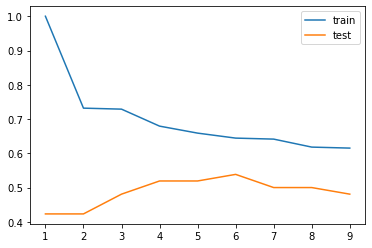

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.13,random_state =5)
training_accuracy=[]
test_accuracy=[]
nei=range(1,10)
for n in nei:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    print(knn)
    y_pred = knn.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.confusion_matrix(y_test,y_pred))
    
    
plt.plot(nei,training_accuracy,label='train')
plt.plot(nei,test_accuracy,label='test')
plt.legend()

In [223]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.20)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.65      0.77      0.70        26
           2       0.59      0.38      0.47        26
           3       0.80      0.95      0.87        21

    accuracy                           0.70        77
   macro avg       0.76      0.78      0.76        77
weighted avg       0.69      0.70      0.68        77

[[ 4  0  0  0]
 [ 0 20  6  0]
 [ 0 11 10  5]
 [ 0  0  1 20]]
